# Ekstraksi Informasi dari Berita Kriminal Indonesia menggunakan Named Entity Recognition (NER).

## Setting Up
### Install the required libraries

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as nltk_stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory as SastrawiStopWordRemoverFactory
nltk.download('punkt')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load Dataset

In [2]:
df = pd.read_csv("../data/processed/cleaned_all_data.csv", sep=',')
df.head()

url  \
0  https://www.detik.com/sumbagsel/hukum-dan-krim...   
1  https://www.detik.com/jatim/hukum-dan-kriminal...   
2  https://www.detik.com/jatim/hukum-dan-kriminal...   
3  https://www.detik.com/sumut/hukum-dan-kriminal...   
4  https://www.detik.com/sumut/hukum-dan-kriminal...   

                                               judul              tanggal  \
0  4 Anak di Bawah Umur Tersangka Pembunuhan di P...  2024-09-05 20:30:00   
1  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...  2024-09-05 18:38:00   
2  Kriminalitas Surabaya Marak, Pengamat Sebut Pe...  2024-09-05 02:01:00   
3  Pekerja Kafe Disiram Air Keras hingga Wajah 'B...  2024-09-04 21:40:00   
4  Hilang Nyawa Pria di Simalungun gegara Rebutan...  2024-09-03 09:03:00   

                                          isi_berita  panjang_judul  \
0  Pelaku pembunuhan dan pemerkosaan AA (14) seor...             73   
1  Dalam waktu kurang lebih 3 bulan, Polres Probo...             64   
2  Sejumlah kejadian kriminalitas kian marak terj...             72   
3  Seorang pekerja kafe di Cengkareng, MAS (32), ...             71   
4  Hanya gegara rebutan mikrofon untuk bernyanyi ...             70   

   panjang_isi_berita  
0                2370  
1                1764  
2                1224  
3                1995  
4                1398

## Preprocessing
### Tokenization

In [3]:
def remove_punctuation(text):
    if not isinstance(text, str):
        text = str(text)
    return re.sub(r'[^\w\s]', '', text)

df['judul_rp'] = df['judul'].apply(remove_punctuation)
df['isi_rp'] = df['isi_berita'].apply(remove_punctuation)

print("Hasil setelah membersihkan tanda baca secara terpisah:")
print(df[['judul', 'judul_rp', 'isi_berita', 'isi_rp']].head())

Hasil setelah membersihkan tanda baca secara terpisah:
                                               judul  \
0  4 Anak di Bawah Umur Tersangka Pembunuhan di P...   
1  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...   
2  Kriminalitas Surabaya Marak, Pengamat Sebut Pe...   
3  Pekerja Kafe Disiram Air Keras hingga Wajah 'B...   
4  Hilang Nyawa Pria di Simalungun gegara Rebutan...   

                                            judul_rp  \
0  4 Anak di Bawah Umur Tersangka Pembunuhan di P...   
1  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...   
2  Kriminalitas Surabaya Marak Pengamat Sebut Pen...   
3  Pekerja Kafe Disiram Air Keras hingga Wajah Be...   
4  Hilang Nyawa Pria di Simalungun gegara Rebutan...   

                                          isi_berita  \
0  Pelaku pembunuhan dan pemerkosaan AA (14) seor...   
1  Dalam waktu kurang lebih 3 bulan, Polres Probo...   
2  Sejumlah kejadian kriminalitas kian marak terj...   
3  Seorang pekerja kafe di Cengkareng, MAS (32)

In [4]:
df['judul_rp'] = df['judul_rp'].fillna('')
df['isi_rp'] = df['isi_rp'].fillna('')

# Tokenisasi 
df['judul_tokens'] = df['judul_rp'].apply(word_tokenize)
df['isi_tokens'] = df['isi_rp'].apply(word_tokenize)

# Hasil tokenisasi
df[['judul_tokens', 'isi_tokens']].head()

judul_tokens  \
0  [4, Anak, di, Bawah, Umur, Tersangka, Pembunuh...   
1  [26, Tersangka, Dibekuk, Selama, 3, Bulan, Ter...   
2  [Kriminalitas, Surabaya, Marak, Pengamat, Sebu...   
3  [Pekerja, Kafe, Disiram, Air, Keras, hingga, W...   
4  [Hilang, Nyawa, Pria, di, Simalungun, gegara, ...   

                                          isi_tokens  
0  [Pelaku, pembunuhan, dan, pemerkosaan, AA, 14,...  
1  [Dalam, waktu, kurang, lebih, 3, bulan, Polres...  
2  [Sejumlah, kejadian, kriminalitas, kian, marak...  
3  [Seorang, pekerja, kafe, di, Cengkareng, MAS, ...  
4  [Hanya, gegara, rebutan, mikrofon, untuk, bern...

### Casefolding


In [5]:
df['judul_tokens_lower'] = df['judul_tokens'].apply(lambda tokens: [token.lower() for token in tokens])
df['isi_tokens_lower'] = df['isi_tokens'].apply(lambda tokens: [token.lower() for token in tokens])

df[['judul_tokens_lower', 'isi_tokens_lower']].head()

judul_tokens_lower  \
0  [4, anak, di, bawah, umur, tersangka, pembunuh...   
1  [26, tersangka, dibekuk, selama, 3, bulan, ter...   
2  [kriminalitas, surabaya, marak, pengamat, sebu...   
3  [pekerja, kafe, disiram, air, keras, hingga, w...   
4  [hilang, nyawa, pria, di, simalungun, gegara, ...   

                                    isi_tokens_lower  
0  [pelaku, pembunuhan, dan, pemerkosaan, aa, 14,...  
1  [dalam, waktu, kurang, lebih, 3, bulan, polres...  
2  [sejumlah, kejadian, kriminalitas, kian, marak...  
3  [seorang, pekerja, kafe, di, cengkareng, mas, ...  
4  [hanya, gegara, rebutan, mikrofon, untuk, bern...

### Stemming

In [6]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['judul_stemmed'] = df['judul_tokens_lower'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
df['isi_stemmed'] = df['isi_tokens_lower'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

df[['judul_stemmed', 'isi_stemmed']].head()

judul_stemmed  \
0  [4, anak, di, bawah, umur, sangka, bunuh, di, ...   
1  [26, sangka, bekuk, lama, 3, bulan, akhir, di,...   
2  [kerja, kafe, siram, air, keras, hingga, wajah...   
3  [hilang, nyawa, pria, di, simalungun, gegara, ...   
4  [utang, rp, 3, juta, bikin, pegawai, akper, te...   

                                         isi_stemmed  
0  [laku, bunuh, dan, perkosa, aa, 14, orang, rem...  
1  [dalam, waktu, kurang, lebih, 3, bulan, polres...  
2  [orang, kerja, kafe, di, cengkareng, mas, 32, ...  
3  [hanya, gegara, rebut, mikrofon, untuk, nyanyi...  
4  [hidup, pria, nama, monika, hutauruk, 45, haru...

In [6]:
df.head()

url  \
0  https://www.detik.com/sumbagsel/hukum-dan-krim...   
1  https://www.detik.com/jatim/hukum-dan-kriminal...   
2  https://www.detik.com/jatim/hukum-dan-kriminal...   
3  https://www.detik.com/sumut/hukum-dan-kriminal...   
4  https://www.detik.com/sumut/hukum-dan-kriminal...   

                                               judul              tanggal  \
0  4 Anak di Bawah Umur Tersangka Pembunuhan di P...  2024-09-05 20:30:00   
1  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...  2024-09-05 18:38:00   
2  Kriminalitas Surabaya Marak, Pengamat Sebut Pe...  2024-09-05 02:01:00   
3  Pekerja Kafe Disiram Air Keras hingga Wajah 'B...  2024-09-04 21:40:00   
4  Hilang Nyawa Pria di Simalungun gegara Rebutan...  2024-09-03 09:03:00   

                                          isi_berita  panjang_judul  \
0  Pelaku pembunuhan dan pemerkosaan AA (14) seor...             73   
1  Dalam waktu kurang lebih 3 bulan, Polres Probo...             64   
2  Sejumlah kejadian kriminalitas kian marak terj...             72   
3  Seorang pekerja kafe di Cengkareng, MAS (32), ...             71   
4  Hanya gegara rebutan mikrofon untuk bernyanyi ...             70   

   panjang_isi_berita                                           judul_rp  \
0                2370  4 Anak di Bawah Umur Tersangka Pembunuhan di P...   
1                1764  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...   
2                1224  Kriminalitas Surabaya Marak Pengamat Sebut Pen...   
3                1995  Pekerja Kafe Disiram Air Keras hingga Wajah Be...   
4                1398  Hilang Nyawa Pria di Simalungun gegara Rebutan...   

                                              isi_rp  \
0  Pelaku pembunuhan dan pemerkosaan AA 14 seoran...   
1  Dalam waktu kurang lebih 3 bulan Polres Probol...   
2  Sejumlah kejadian kriminalitas kian marak terj...   
3  Seorang pekerja kafe di Cengkareng MAS 32 didu...   
4  Hanya gegara rebutan mikrofon untuk bernyanyi ...   

                                        judul_tokens  \
0  [4, Anak, di, Bawah, Umur, Tersangka, Pembunuh...   
1  [26, Tersangka, Dibekuk, Selama, 3, Bulan, Ter...   
2  [Kriminalitas, Surabaya, Marak, Pengamat, Sebu...   
3  [Pekerja, Kafe, Disiram, Air, Keras, hingga, W...   
4  [Hilang, Nyawa, Pria, di, Simalungun, gegara, ...   

                                          isi_tokens  \
0  [Pelaku, pembunuhan, dan, pemerkosaan, AA, 14,...   
1  [Dalam, waktu, kurang, lebih, 3, bulan, Polres...   
2  [Sejumlah, kejadian, kriminalitas, kian, marak...   
3  [Seorang, pekerja, kafe, di, Cengkareng, MAS, ...   
4  [Hanya, gegara, rebutan, mikrofon, untuk, bern...   

                                  judul_tokens_lower  \
0  [4, anak, di, bawah, umur, tersangka, pembunuh...   
1  [26, tersangka, dibekuk, selama, 3, bulan, ter...   
2  [kriminalitas, surabaya, marak, pengamat, sebu...   
3  [pekerja, kafe, disiram, air, keras, hingga, w...   
4  [hilang, nyawa, pria, di, simalungun, gegara, ...   

                                    isi_tokens_lower  
0  [pelaku, pembunuhan, dan, pemerkosaan, aa, 14,...  
1  [dalam, waktu, kurang, lebih, 3, bulan, polres...  
2  [sejumlah, kejadian, kriminalitas, kian, marak...  
3  [seorang, pekerja, kafe, di, cengkareng, mas, ...  
4  [hanya, gegara, rebutan, mikrofon, untuk, bern...

In [ ]:
df.to_csv("../data/processed/stemmed.csv", sep=',', index=False)

### Stop Word Removal & POS Tagging

In [7]:
df = pd.read_csv("../data/processed/stemmed.csv", sep=',')
df.head()

url  \
0  https://www.detik.com/sumbagsel/hukum-dan-krim...   
1  https://www.detik.com/jatim/hukum-dan-kriminal...   
2  https://www.detik.com/sumut/hukum-dan-kriminal...   
3  https://www.detik.com/sumut/hukum-dan-kriminal...   
4  https://www.detik.com/sumut/hukum-dan-kriminal...   

                                               judul              tanggal  \
0  4 Anak di Bawah Umur Tersangka Pembunuhan di P...  2024-09-05 20:30:00   
1  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...  2024-09-05 18:38:00   
2  Pekerja Kafe Disiram Air Keras hingga Wajah 'B...  2024-09-04 21:40:00   
3  Hilang Nyawa Pria di Simalungun gegara Rebutan...  2024-09-03 09:03:00   
4  Utang Rp 3 Juta Bikin Pegawai Akper Tewas di T...  2024-09-03 08:01:00   

                                          isi_berita  panjang_judul  \
0  Pelaku pembunuhan dan pemerkosaan AA (14) seor...             73   
1  Dalam waktu kurang lebih 3 bulan, Polres Probo...             64   
2  Seorang pekerja kafe di Cengkareng, MAS (32), ...             71   
3  Hanya gegara rebutan mikrofon untuk bernyanyi ...             70   
4  Hidup pria bernama Monika Hutauruk (45) harus ...             68   

   panjang_isi_berita                                           judul_rp  \
0                2370  4 Anak di Bawah Umur Tersangka Pembunuhan di P...   
1                1764  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...   
2                1995  Pekerja Kafe Disiram Air Keras hingga Wajah Be...   
3                1398  Hilang Nyawa Pria di Simalungun gegara Rebutan...   
4                3907  Utang Rp 3 Juta Bikin Pegawai Akper Tewas di T...   

                                              isi_rp  \
0  Pelaku pembunuhan dan pemerkosaan AA 14 seoran...   
1  Dalam waktu kurang lebih 3 bulan Polres Probol...   
2  Seorang pekerja kafe di Cengkareng MAS 32 didu...   
3  Hanya gegara rebutan mikrofon untuk bernyanyi ...   
4  Hidup pria bernama Monika Hutauruk 45 harus be...   

                                        judul_tokens  \
0  ['4', 'Anak', 'di', 'Bawah', 'Umur', 'Tersangk...   
1  ['26', 'Tersangka', 'Dibekuk', 'Selama', '3', ...   
2  ['Pekerja', 'Kafe', 'Disiram', 'Air', 'Keras',...   
3  ['Hilang', 'Nyawa', 'Pria', 'di', 'Simalungun'...   
4  ['Utang', 'Rp', '3', 'Juta', 'Bikin', 'Pegawai...   

                                          isi_tokens  \
0  ['Pelaku', 'pembunuhan', 'dan', 'pemerkosaan',...   
1  ['Dalam', 'waktu', 'kurang', 'lebih', '3', 'bu...   
2  ['Seorang', 'pekerja', 'kafe', 'di', 'Cengkare...   
3  ['Hanya', 'gegara', 'rebutan', 'mikrofon', 'un...   
4  ['Hidup', 'pria', 'bernama', 'Monika', 'Hutaur...   

                                  judul_tokens_lower  \
0  ['4', 'anak', 'di', 'bawah', 'umur', 'tersangk...   
1  ['26', 'tersangka', 'dibekuk', 'selama', '3', ...   
2  ['pekerja', 'kafe', 'disiram', 'air', 'keras',...   
3  ['hilang', 'nyawa', 'pria', 'di', 'simalungun'...   
4  ['utang', 'rp', '3', 'juta', 'bikin', 'pegawai...   

                                    isi_tokens_lower  \
0  ['pelaku', 'pembunuhan', 'dan', 'pemerkosaan',...   
1  ['dalam', 'waktu', 'kurang', 'lebih', '3', 'bu...   
2  ['seorang', 'pekerja', 'kafe', 'di', 'cengkare...   
3  ['hanya', 'gegara', 'rebutan', 'mikrofon', 'un...   
4  ['hidup', 'pria', 'bernama', 'monika', 'hutaur...   

                                       judul_stemmed  \
0  ['4', 'anak', 'di', 'bawah', 'umur', 'sangka',...   
1  ['26', 'sangka', 'bekuk', 'lama', '3', 'bulan'...   
2  ['kerja', 'kafe', 'siram', 'air', 'keras', 'hi...   
3  ['hilang', 'nyawa', 'pria', 'di', 'simalungun'...   
4  ['utang', 'rp', '3', 'juta', 'bikin', 'pegawai...   

                                         isi_stemmed  
0  ['laku', 'bunuh', 'dan', 'perkosa', 'aa', '14'...  
1  ['dalam', 'waktu', 'kurang', 'lebih', '3', 'bu...  
2  ['orang', 'kerja', 'kafe', 'di', 'cengkareng',...  
3  ['hanya', 'gegara', 'rebut', 'mikrofon', 'untu...  
4  ['hidup', 'pria', 'nama', 'monika', 'hutauruk'...

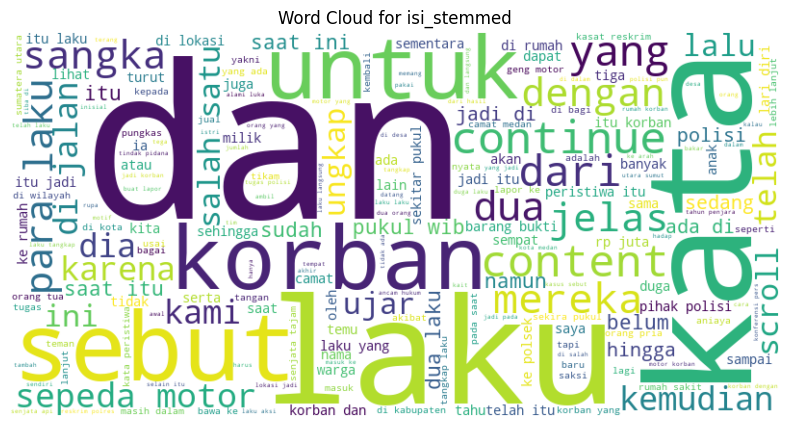

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
generate_wordcloud(df['isi_stemmed'].explode(), 'Word Cloud for isi_stemmed')

In [10]:
import ast

def convert_string_to_list(text_list):
    try:
        if isinstance(text_list, str) and text_list.startswith('[') and text_list.endswith(']'):
            return ast.literal_eval(text_list)
        elif isinstance(text_list, list): 
            return text_list
    except (ValueError, SyntaxError):
        print(f"Peringatan: Gagal mengonversi string ke list: {text_list}")
        return []
    return [] 

for col in ['judul_stemmed', 'isi_stemmed']:
    if col in df.columns:
        df[col] = df[col].apply(convert_string_to_list)
    else:
        print(f"Kolom {col} tidak ditemukan.")

print("Tipe data setelah konversi dan contoh isi kolom stemmed:")
if 'judul_stemmed' in df.columns and not df['judul_stemmed'].empty:
    print(f"Tipe judul_stemmed[0]: {type(df['judul_stemmed'].iloc[0])}")
    print(df[['judul_stemmed', 'isi_stemmed']].head())

Tipe data setelah konversi dan contoh isi kolom stemmed:
Tipe judul_stemmed[0]: <class 'list'>
                                       judul_stemmed  \
0  [4, anak, di, bawah, umur, sangka, bunuh, di, ...   
1  [26, sangka, bekuk, lama, 3, bulan, akhir, di,...   
2  [kerja, kafe, siram, air, keras, hingga, wajah...   
3  [hilang, nyawa, pria, di, simalungun, gegara, ...   
4  [utang, rp, 3, juta, bikin, pegawai, akper, te...   

                                         isi_stemmed  
0  [laku, bunuh, dan, perkosa, aa, 14, orang, rem...  
1  [dalam, waktu, kurang, lebih, 3, bulan, polres...  
2  [orang, kerja, kafe, di, cengkareng, mas, 32, ...  
3  [hanya, gegara, rebut, mikrofon, untuk, nyanyi...  
4  [hidup, pria, nama, monika, hutauruk, 45, haru...  


In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory as SastrawiStopWordRemoverFactory

sastrawi_factory = SastrawiStopWordRemoverFactory()
sastrawi_stopwords_list = sastrawi_factory.get_stop_words()
print(f"Contoh beberapa stopwords Sastrawi: {sastrawi_stopwords_list[:10]}")

def remove_sastrawi_stopwords(tokens):
    if not isinstance(tokens, list):
        return [] 
    return [token for token in tokens if token not in sastrawi_stopwords_list]

df['judul_stop_removed'] = df['judul_stemmed'].apply(remove_sastrawi_stopwords)
df['isi_stop_removed'] = df['isi_stemmed'].apply(remove_sastrawi_stopwords)

print("\nDataFrame setelah Stopword Removal:")
df[['judul_stemmed', 'judul_stop_removed', 'isi_stemmed', 'isi_stop_removed']].head()

Contoh beberapa stopwords Sastrawi: ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua']

DataFrame setelah Stopword Removal:


judul_stemmed  \
0  [4, anak, di, bawah, umur, sangka, bunuh, di, ...   
1  [26, sangka, bekuk, lama, 3, bulan, akhir, di,...   
2  [kerja, kafe, siram, air, keras, hingga, wajah...   
3  [hilang, nyawa, pria, di, simalungun, gegara, ...   
4  [utang, rp, 3, juta, bikin, pegawai, akper, te...   

                                  judul_stop_removed  \
0  [4, anak, bawah, umur, sangka, bunuh, palemban...   
1  [26, sangka, bekuk, lama, 3, bulan, akhir, kot...   
2  [kerja, kafe, siram, air, keras, hingga, wajah...   
3  [hilang, nyawa, pria, simalungun, gegara, rebu...   
4  [utang, rp, 3, juta, bikin, pegawai, akper, te...   

                                         isi_stemmed  \
0  [laku, bunuh, dan, perkosa, aa, 14, orang, rem...   
1  [dalam, waktu, kurang, lebih, 3, bulan, polres...   
2  [orang, kerja, kafe, di, cengkareng, mas, 32, ...   
3  [hanya, gegara, rebut, mikrofon, untuk, nyanyi...   
4  [hidup, pria, nama, monika, hutauruk, 45, haru...   

                                    isi_stop_removed  
0  [laku, bunuh, perkosa, aa, 14, orang, remaja, ...  
1  [waktu, kurang, lebih, 3, bulan, polres, probo...  
2  [orang, kerja, kafe, cengkareng, mas, 32, duga...  
3  [gegara, rebut, mikrofon, nyanyi, warung, tuak...  
4  [hidup, pria, nama, monika, hutauruk, 45, akhi...

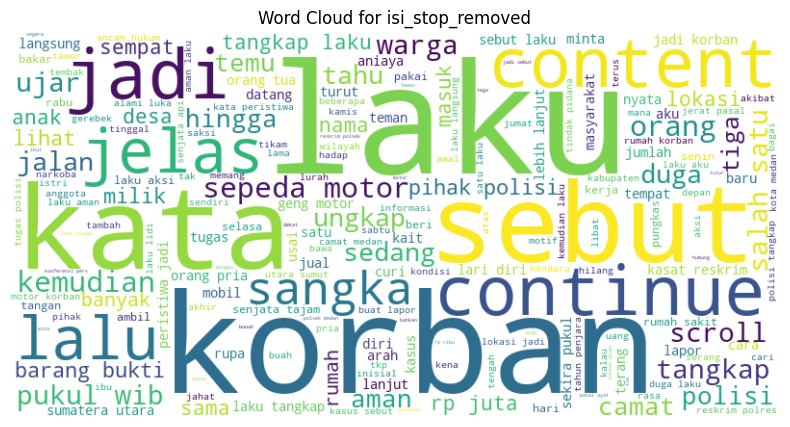

In [ ]:
generate_wordcloud(df['isi_stop_removed'].explode(), 'Word Cloud for isi_stop_removed')

In [13]:
stopwords_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQSgOspA2PfHRdIteS1IE7C3pBRiA2Udl-iIvRjZRhdTkuJa7BGpajHrDXRit2cLkZNM3_XSanKahQx/pub?gid=1555277881&single=true&output=csv'
stopwords = pd.read_csv(stopwords_url)['stopword'].to_list()
stopwords[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [17]:
def remove_stopwords(tokens):
    if not isinstance(tokens, list):
        return []
    return [word for word in tokens if word not in stopwords]

df['judul_stop_removed'] = df['judul_stop_removed'].apply(remove_stopwords)
df['isi_stop_removed'] = df['isi_stop_removed'].apply(remove_stopwords)

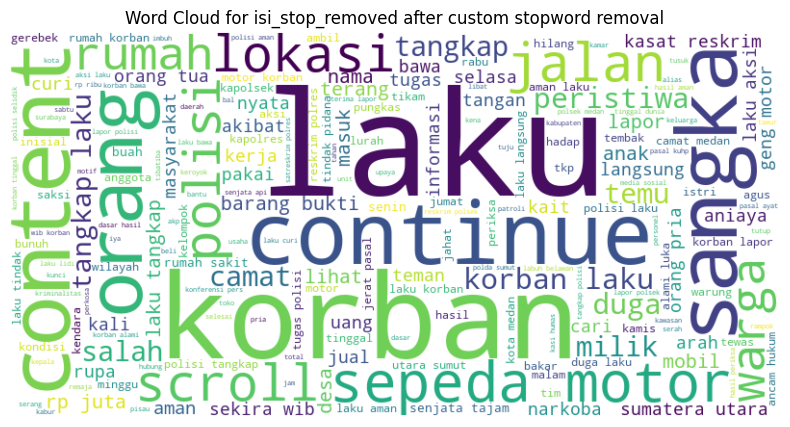

In [ ]:
generate_wordcloud(df['isi_stop_removed'].explode(), 'Word Cloud for isi_stop_removed after custom stopword removal')


In [19]:
df.head()

url  \
0  https://www.detik.com/sumbagsel/hukum-dan-krim...   
1  https://www.detik.com/jatim/hukum-dan-kriminal...   
2  https://www.detik.com/sumut/hukum-dan-kriminal...   
3  https://www.detik.com/sumut/hukum-dan-kriminal...   
4  https://www.detik.com/sumut/hukum-dan-kriminal...   

                                               judul              tanggal  \
0  4 Anak di Bawah Umur Tersangka Pembunuhan di P...  2024-09-05 20:30:00   
1  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...  2024-09-05 18:38:00   
2  Pekerja Kafe Disiram Air Keras hingga Wajah 'B...  2024-09-04 21:40:00   
3  Hilang Nyawa Pria di Simalungun gegara Rebutan...  2024-09-03 09:03:00   
4  Utang Rp 3 Juta Bikin Pegawai Akper Tewas di T...  2024-09-03 08:01:00   

                                          isi_berita  panjang_judul  \
0  Pelaku pembunuhan dan pemerkosaan AA (14) seor...             73   
1  Dalam waktu kurang lebih 3 bulan, Polres Probo...             64   
2  Seorang pekerja kafe di Cengkareng, MAS (32), ...             71   
3  Hanya gegara rebutan mikrofon untuk bernyanyi ...             70   
4  Hidup pria bernama Monika Hutauruk (45) harus ...             68   

   panjang_isi_berita                                           judul_rp  \
0                2370  4 Anak di Bawah Umur Tersangka Pembunuhan di P...   
1                1764  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...   
2                1995  Pekerja Kafe Disiram Air Keras hingga Wajah Be...   
3                1398  Hilang Nyawa Pria di Simalungun gegara Rebutan...   
4                3907  Utang Rp 3 Juta Bikin Pegawai Akper Tewas di T...   

                                              isi_rp  \
0  Pelaku pembunuhan dan pemerkosaan AA 14 seoran...   
1  Dalam waktu kurang lebih 3 bulan Polres Probol...   
2  Seorang pekerja kafe di Cengkareng MAS 32 didu...   
3  Hanya gegara rebutan mikrofon untuk bernyanyi ...   
4  Hidup pria bernama Monika Hutauruk 45 harus be...   

                                        judul_tokens  \
0  ['4', 'Anak', 'di', 'Bawah', 'Umur', 'Tersangk...   
1  ['26', 'Tersangka', 'Dibekuk', 'Selama', '3', ...   
2  ['Pekerja', 'Kafe', 'Disiram', 'Air', 'Keras',...   
3  ['Hilang', 'Nyawa', 'Pria', 'di', 'Simalungun'...   
4  ['Utang', 'Rp', '3', 'Juta', 'Bikin', 'Pegawai...   

                                          isi_tokens  \
0  ['Pelaku', 'pembunuhan', 'dan', 'pemerkosaan',...   
1  ['Dalam', 'waktu', 'kurang', 'lebih', '3', 'bu...   
2  ['Seorang', 'pekerja', 'kafe', 'di', 'Cengkare...   
3  ['Hanya', 'gegara', 'rebutan', 'mikrofon', 'un...   
4  ['Hidup', 'pria', 'bernama', 'Monika', 'Hutaur...   

                                  judul_tokens_lower  \
0  ['4', 'anak', 'di', 'bawah', 'umur', 'tersangk...   
1  ['26', 'tersangka', 'dibekuk', 'selama', '3', ...   
2  ['pekerja', 'kafe', 'disiram', 'air', 'keras',...   
3  ['hilang', 'nyawa', 'pria', 'di', 'simalungun'...   
4  ['utang', 'rp', '3', 'juta', 'bikin', 'pegawai...   

                                    isi_tokens_lower  \
0  ['pelaku', 'pembunuhan', 'dan', 'pemerkosaan',...   
1  ['dalam', 'waktu', 'kurang', 'lebih', '3', 'bu...   
2  ['seorang', 'pekerja', 'kafe', 'di', 'cengkare...   
3  ['hanya', 'gegara', 'rebutan', 'mikrofon', 'un...   
4  ['hidup', 'pria', 'bernama', 'monika', 'hutaur...   

                                       judul_stemmed  \
0  [4, anak, di, bawah, umur, sangka, bunuh, di, ...   
1  [26, sangka, bekuk, lama, 3, bulan, akhir, di,...   
2  [kerja, kafe, siram, air, keras, hingga, wajah...   
3  [hilang, nyawa, pria, di, simalungun, gegara, ...   
4  [utang, rp, 3, juta, bikin, pegawai, akper, te...   

                                         isi_stemmed  \
0  [laku, bunuh, dan, perkosa, aa, 14, orang, rem...   
1  [dalam, waktu, kurang, lebih, 3, bulan, polres...   
2  [orang, kerja, kafe, di, cengkareng, mas, 32, ...   
3  [hanya, gegara, rebut, mikrofon, untuk, nyanyi...   
4  [hidup, pria, nama, monika, hutauruk, 45, haru...   

      

In [21]:
import stanza

try:
    stanza.download('id') 
except Exception as e:
    print(f"Error downloading Stanza model: {e}")
    print("Pastikan Anda memiliki koneksi internet atau model sudah terunduh sebelumnya.")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-24 23:48:15 INFO: Downloaded file to C:\Users\User\stanza_resources\resources.json
2025-05-24 23:48:15 INFO: Downloading default packages for language: id (Indonesian) ...
2025-05-24 23:49:00 INFO: Downloaded file to C:\Users\User\stanza_resources\id\default.zip
2025-05-24 23:49:06 INFO: Finished downloading models and saved to C:\Users\User\stanza_resources


In [22]:
try:
    nlp_id = stanza.Pipeline('id', processors='tokenize,pos', verbose=False)
except Exception as e:
    print(f"Error initializing Stanza pipeline: {e}")
    print("Pastikan model 'id' sudah terunduh dengan benar.")
    nlp_id = None 

In [23]:
def pos_tag_stanza(token_list):
    if not nlp_id or not token_list or not isinstance(token_list, list):
        return []
    
    text = " ".join(token_list)
    if not text.strip(): 
        return []
        
    doc = nlp_id(text)
    pos_tags = []
    for sent in doc.sentences:
        for word in sent.words:
            pos_tags.append((word.text, word.upos)) 
    return pos_tags

In [24]:
if nlp_id:
    print("\nMemulai proses POS Tagging untuk kolom 'judul_stop_removed'...")
    df['judul_pos_tags'] = df['judul_stop_removed'].apply(pos_tag_stanza)
    print("POS Tagging untuk judul selesai.")

    print("\nMemulai proses POS Tagging untuk kolom 'isi_stop_removed'...")
    df['isi_pos_tags'] = df['isi_stop_removed'].apply(pos_tag_stanza)
    print("POS Tagging untuk isi berita selesai.")
else:
    print("\nStanza pipeline tidak terinisialisasi. Langkah POS tagging dilewati.")
    df['judul_pos_tags'] = pd.Series([[] for _ in range(len(df))])
    df['isi_pos_tags'] = pd.Series([[] for _ in range(len(df))])



Memulai proses POS Tagging untuk kolom 'judul_stop_removed'...
POS Tagging untuk judul selesai.

Memulai proses POS Tagging untuk kolom 'isi_stop_removed'...
POS Tagging untuk isi berita selesai.


In [25]:
df[['judul_stop_removed', 'judul_pos_tags', 'isi_stop_removed', 'isi_pos_tags']].head()

judul_stop_removed  \
0          [4, anak, umur, sangka, bunuh, palembang]   
1          [26, sangka, bekuk, 3, kota, probolinggo]   
2  [kerja, kafe, siram, air, keras, wajah, asap, ...   
3  [hilang, nyawa, pria, simalungun, gegara, rebu...   
4  [utang, rp, 3, juta, bikin, pegawai, akper, te...   

                                      judul_pos_tags  \
0  [(4, NUM), (anak, NOUN), (umur, NOUN), (sangka...   
1  [(26, NUM), (sangka, NOUN), (bekuk, VERB), (3,...   
2  [(kerja, NOUN), (kafe, NOUN), (siram, NOUN), (...   
3  [(hilang, VERB), (nyawa, NOUN), (pria, NOUN), ...   
4  [(utang, NOUN), (rp, PROPN), (3, NUM), (juta, ...   

                                    isi_stop_removed  \
0  [laku, bunuh, perkosa, aa, 14, orang, remaja, ...   
1  [3, polres, probolinggo, kota, bekuk, puluh, s...   
2  [orang, kerja, kafe, cengkareng, mas, 32, duga...   
3  [gegara, rebut, mikrofon, nyanyi, warung, tuak...   
4  [hidup, pria, nama, monika, hutauruk, 45, bunu...   

                                        isi_pos_tags  
0  [(laku, NOUN), (bunuh, VERB), (perkosa, NOUN),...  
1  [(3, NUM), (polres, NOUN), (probolinggo, NOUN)...  
2  [(orang, NOUN), (kerja, NOUN), (kafe, NOUN), (...  
3  [(gegara, NOUN), (rebut, VERB), (mikrofon, NOU...  
4  [(hidup, NOUN), (pria, NOUN), (nama, NOUN), (m...

In [26]:
df.head()

url  \
0  https://www.detik.com/sumbagsel/hukum-dan-krim...   
1  https://www.detik.com/jatim/hukum-dan-kriminal...   
2  https://www.detik.com/sumut/hukum-dan-kriminal...   
3  https://www.detik.com/sumut/hukum-dan-kriminal...   
4  https://www.detik.com/sumut/hukum-dan-kriminal...   

                                               judul              tanggal  \
0  4 Anak di Bawah Umur Tersangka Pembunuhan di P...  2024-09-05 20:30:00   
1  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...  2024-09-05 18:38:00   
2  Pekerja Kafe Disiram Air Keras hingga Wajah 'B...  2024-09-04 21:40:00   
3  Hilang Nyawa Pria di Simalungun gegara Rebutan...  2024-09-03 09:03:00   
4  Utang Rp 3 Juta Bikin Pegawai Akper Tewas di T...  2024-09-03 08:01:00   

                                          isi_berita  panjang_judul  \
0  Pelaku pembunuhan dan pemerkosaan AA (14) seor...             73   
1  Dalam waktu kurang lebih 3 bulan, Polres Probo...             64   
2  Seorang pekerja kafe di Cengkareng, MAS (32), ...             71   
3  Hanya gegara rebutan mikrofon untuk bernyanyi ...             70   
4  Hidup pria bernama Monika Hutauruk (45) harus ...             68   

   panjang_isi_berita                                           judul_rp  \
0                2370  4 Anak di Bawah Umur Tersangka Pembunuhan di P...   
1                1764  26 Tersangka Dibekuk Selama 3 Bulan Terakhir d...   
2                1995  Pekerja Kafe Disiram Air Keras hingga Wajah Be...   
3                1398  Hilang Nyawa Pria di Simalungun gegara Rebutan...   
4                3907  Utang Rp 3 Juta Bikin Pegawai Akper Tewas di T...   

                                              isi_rp  \
0  Pelaku pembunuhan dan pemerkosaan AA 14 seoran...   
1  Dalam waktu kurang lebih 3 bulan Polres Probol...   
2  Seorang pekerja kafe di Cengkareng MAS 32 didu...   
3  Hanya gegara rebutan mikrofon untuk bernyanyi ...   
4  Hidup pria bernama Monika Hutauruk 45 harus be...   

                                        judul_tokens  \
0  ['4', 'Anak', 'di', 'Bawah', 'Umur', 'Tersangk...   
1  ['26', 'Tersangka', 'Dibekuk', 'Selama', '3', ...   
2  ['Pekerja', 'Kafe', 'Disiram', 'Air', 'Keras',...   
3  ['Hilang', 'Nyawa', 'Pria', 'di', 'Simalungun'...   
4  ['Utang', 'Rp', '3', 'Juta', 'Bikin', 'Pegawai...   

                                          isi_tokens  \
0  ['Pelaku', 'pembunuhan', 'dan', 'pemerkosaan',...   
1  ['Dalam', 'waktu', 'kurang', 'lebih', '3', 'bu...   
2  ['Seorang', 'pekerja', 'kafe', 'di', 'Cengkare...   
3  ['Hanya', 'gegara', 'rebutan', 'mikrofon', 'un...   
4  ['Hidup', 'pria', 'bernama', 'Monika', 'Hutaur...   

                                  judul_tokens_lower  \
0  ['4', 'anak', 'di', 'bawah', 'umur', 'tersangk...   
1  ['26', 'tersangka', 'dibekuk', 'selama', '3', ...   
2  ['pekerja', 'kafe', 'disiram', 'air', 'keras',...   
3  ['hilang', 'nyawa', 'pria', 'di', 'simalungun'...   
4  ['utang', 'rp', '3', 'juta', 'bikin', 'pegawai...   

                                    isi_tokens_lower  \
0  ['pelaku', 'pembunuhan', 'dan', 'pemerkosaan',...   
1  ['dalam', 'waktu', 'kurang', 'lebih', '3', 'bu...   
2  ['seorang', 'pekerja', 'kafe', 'di', 'cengkare...   
3  ['hanya', 'gegara', 'rebutan', 'mikrofon', 'un...   
4  ['hidup', 'pria', 'bernama', 'monika', 'hutaur...   

                                       judul_stemmed  \
0  [4, anak, di, bawah, umur, sangka, bunuh, di, ...   
1  [26, sangka, bekuk, lama, 3, bulan, akhir, di,...   
2  [kerja, kafe, siram, air, keras, hingga, wajah...   
3  [hilang, nyawa, pria, di, simalungun, gegara, ...   
4  [utang, rp, 3, juta, bikin, pegawai, akper, te...   

                                         isi_stemmed  \
0  [laku, bunuh, dan, perkosa, aa, 14, orang, rem...   
1  [dalam, waktu, kurang, lebih, 3, bulan, polres...   
2  [orang, kerja, kafe, di, cengkareng, mas, 32, ...   
3  [hanya, gegara, rebut, mikrofon, untuk, nyanyi...   
4  [hidup, pria, nama, monika, hutauruk, 45, haru...   

      

In [27]:
df.to_csv("../data/processed/preprocessed.csv", sep=',', index=False)

## Prepare for Labelling

In [33]:
df['id'] = ['D{:04d}'.format(i+1) for i in range(len(df))]

In [34]:
result = pd.DataFrame(columns=['id', 'token', 'postag', 'entity'])

for i in range(len(df)):
    id = df['id'][i]
    print(id)
    list_pos_tags = eval(df['isi_pos_tags'][0])  

    for token_post in list_pos_tags:
        print(token_post)
        token= token_post[0]
        post = token_post[1]

        result = pd.concat([result, pd.DataFrame({'id': [id], 'token': [token], 'postag': [post], 'entity': [None]})], ignore_index=True)

result.to_csv('../data/processed/pseudolabelling.csv', index=False)

D0001
('laku', 'NOUN')
('bunuh', 'VERB')
('perkosa', 'NOUN')
('aa', 'PROPN')
('14', 'NUM')
('orang', 'NOUN')
('remaja', 'NOUN')
('putri', 'NOUN')
('kubur', 'NOUN')
('cina', 'PROPN')
('palembang', 'PROPN')
('tangkap', 'NOUN')
('sangka', 'NOUN')
('sangka', 'NOUN')
('rupa', 'NOUN')
('anak', 'NOUN')
('umur', 'NOUN')
('korban', 'NOUN')
('hukum', 'NOUN')
('universitas', 'NOUN')
('taman', 'NOUN')
('siswa', 'NOUN')
('palembang', 'PROPN')
('dr', 'PROPN')
('azwar', 'NOUN')
('agus', 'NOUN')
('prihatin', 'NOUN')
('bunuh', 'VERB')
('remaja', 'NOUN')
('putri', 'NOUN')
('laku', 'NOUN')
('remaja', 'NOUN')
('lakilaki', 'NOUN')
('usia', 'NOUN')
('baya', 'NOUN')
('korban', 'NOUN')
('prihatin', 'NOUN')
('lihat', 'VERB')
('aspek', 'NOUN')
('hukum', 'NOUN')
('jahat', 'NOUN')
('bendung', 'NOUN')
('iring', 'NOUN')
('kembang', 'NOUN')
('ilmu', 'NOUN')
('teknologi', 'NOUN')
('peran', 'NOUN')
('media', 'NOUN')
('sosial', 'NOUN')
('salah', 'ADJ')
('sangka', 'VERB')
('akses', 'NOUN')
('film', 'NOUN')
('biru', 'ADJ